## Урок 7. Домашнее задание

In [1]:
import numpy as np
from scipy.linalg import lu
from matplotlib import pyplot as plt

### Введение в линейную алгебру

__Задание 5.1.__ 

1) Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A∙B.


2) Вычислите, по возможности не используя программирование: $(5E)^{-1}$ где Е – единичная матрица размера 5х5.

__Решение:__ <br>
1) Зададим два вектора и проверим для них основные свойства матриц.

In [2]:
a = np.array([1, 5, 9, 2])
b = np.array([4, 8, 1, 3])

print(a)
print(b)

[1 5 9 2]
[4 8 1 3]


Умножение на число:

In [3]:
k = 3

print(a * k)
print(b * k)

[ 3 15 27  6]
[12 24  3  9]


Сложение и вычитание:

In [4]:
print(a + b)
print(a - b)

[ 5 13 10  5]
[-3 -3  8 -1]


Транспонирование вектора-строки может быть произведено следующим образом с помощью библиотеки NumPy:

In [5]:
print(a.reshape(-1, 1))

[[1]
 [5]
 [9]
 [2]]


Умножение векторов:

- Скалярное произведение

In [6]:
np.dot(a, b)

59

In [7]:
np.inner(a, b)

59

- Матричное произведение:

In [8]:
print(a.reshape(-1, 1) * b)

[[ 4  8  1  3]
 [20 40  5 15]
 [36 72  9 27]
 [ 8 16  2  6]]


In [9]:
print(np.outer(a, b))

[[ 4  8  1  3]
 [20 40  5 15]
 [36 72  9 27]
 [ 8 16  2  6]]


Проверим также свойства сложения и умножения матриц для векторов:

### $(k \cdot l) \cdot A = k \cdot (l \cdot A)$

In [10]:
k = 2
l = 3
print((k * l) * a)
print(k * (l * a))

[ 6 30 54 12]
[ 6 30 54 12]


### $k \cdot (A+B) = k \cdot A + k \cdot B $

In [11]:
print(k * (a + b))
print(k * a + k * b)

[10 26 20 10]
[10 26 20 10]


### $(k+l) \cdot A = k \cdot A + l \cdot A $

In [12]:
print((k + l) * a)
print(k * a + l * a)

[ 5 25 45 10]
[ 5 25 45 10]


Следующие свойства проверим для матричного произведения векторов:

### $(A \cdot B) \cdot C = A \cdot (B \cdot C) $

In [13]:
c = np.array([3, 5, 4, 1])

print((a.reshape(-1, 1) * b.reshape(1, -1)) * c.reshape(-1, 1))
print('----------------------')
print(a.reshape(-1, 1) * (b.reshape(1, -1) * c.reshape(-1, 1)))

[[ 12  24   3   9]
 [100 200  25  75]
 [144 288  36 108]
 [  8  16   2   6]]
----------------------
[[ 12  24   3   9]
 [100 200  25  75]
 [144 288  36 108]
 [  8  16   2   6]]


### $(A + B) \cdot C = A \cdot C + B \cdot C $

In [14]:
print(np.outer(a + b, c))
print('----------------------')
print(np.outer(a,c) + np.outer(b, c))

[[15 25 20  5]
 [39 65 52 13]
 [30 50 40 10]
 [15 25 20  5]]
----------------------
[[15 25 20  5]
 [39 65 52 13]
 [30 50 40 10]
 [15 25 20  5]]


### $A \cdot (B + C) = A \cdot B + A \cdot C $

In [15]:
print(np.outer(a, b + c))
print('----------------------')
print(np.outer(a,b) + np.outer(a, c))

[[  7  13   5   4]
 [ 35  65  25  20]
 [ 63 117  45  36]
 [ 14  26  10   8]]
----------------------
[[  7  13   5   4]
 [ 35  65  25  20]
 [ 63 117  45  36]
 [ 14  26  10   8]]


2) Так как $E$ - единичная матрица, то матрица $5E$ - будет диагональной матрицей, у которой на главной диагонали стоят пятерки. Отметим, что согласно определению обратной матрицы: $5E \cdot (5E)^{-1} = E$. Пользуюсь свойствами умножения матриц может преобразовать это выражение следующим образом:
### $$\frac{1}{5}\cdot5E\cdot (5E)^{-1} = \frac{1}{5}E \Rightarrow E\cdot (5E)^{-1} = \frac{1}{5}E$$
Домножим обе части слева на $E^{-1}$:
### $$E^{-1}E\cdot(5E)^{-1}=\frac{1}{5}E^{-1}E$$
По определению это означает, что 
### $$E^{-1}\cdot(5E)^{-1}=\frac{1}{5}E^{-1}$$
Это подтверждает факт, что $E^{-1} = E$, а значит $(5E)^{-1} = \frac{1}{5}E$. Проверим полученный результат, умножив ее на исходную матрицу:
### $$5E\cdot\frac{1}{5}E=E\cdot E = E$$
Проверка пройдена успешно:
### $$(5E)^{-1} = \frac{1}{5}E$$

__Задание 5.2.__ Вычислите определитель:
### $$\begin{vmatrix}
1 & 2 & 3\\ 
4 & 0 & 6\\
7 & 8 & 9
\end{vmatrix}$$

__Решение:__

### $$\begin{vmatrix}
1 & 2 & 3\\ 
4 & 0 & 6\\
7 & 8 & 9
\end{vmatrix} = 1 \cdot \begin{vmatrix}
0 & 6 \\ 
8 & 9
\end{vmatrix} - 2 \cdot \begin{vmatrix}
4 & 6 \\ 
7 & 9
\end{vmatrix} + 3 \cdot \begin{vmatrix}
4 & 0 \\ 
7 & 8
\end{vmatrix} $$ 
### $$\begin{vmatrix}
1 & 2 & 3\\ 
4 & 0 & 6\\
7 & 8 & 9
\end{vmatrix} = 1\cdot(0-48) - 2\cdot(36-42)+3\cdot(32-0)=-48+12+96 = 60$$ 

In [16]:
A  = np.array([[1, 2, 3], 
               [4, 0, 6], 
               [7, 8, 9]])
round(np.linalg.det(A), 2)

60.0

__Задание 5.3.__ 
1. Вычислите матрицу, обратную данной:
### $$\begin{vmatrix}
1 & 2 & 3\\ 
4 & 0 & 6\\
7 & 8 & 9
\end{vmatrix}$$
2. Приведите пример матрицы 4x4, ранг которой равен 1.

__Решение:__ <br>
1. Обозначим данную матрицу как $A$. Как мы выяснили в предыдущем задании данная матрица имеет ненулевой определитель ($det A = 60$),  а значит для нее существует обратная матрица. Построим матрицу алгебраических дополнений $A_{*}$ на основе определителей миноров:
### $$a_{*11} = \begin{vmatrix}
0 & 6\\ 
8 & 9
\end{vmatrix} = -48$$
### $$a_{*12} = -\begin{vmatrix}
4 & 6\\ 
7 & 9
\end{vmatrix} = 6$$
### $$a_{*13} = \begin{vmatrix}
4 & 0\\ 
7 & 8
\end{vmatrix} = 32$$
### $$a_{*21} = -\begin{vmatrix}
2 & 3\\ 
8 & 9
\end{vmatrix} = 6$$
### $$a_{*22} = \begin{vmatrix}
1 & 3\\ 
7 & 9
\end{vmatrix} = -12$$
### $$a_{*23} = -\begin{vmatrix}
1 & 2\\ 
7 & 8
\end{vmatrix} = 6$$
### $$a_{*31} = \begin{vmatrix}
2 & 3\\ 
0 & 6
\end{vmatrix} = 12$$
### $$a_{*32} = -\begin{vmatrix}
1 & 3\\ 
4 & 6
\end{vmatrix} = 6$$
### $$a_{*33} = \begin{vmatrix}
1 & 2\\ 
4 & 0
\end{vmatrix} = -8$$
Тогда, 
### $$A_{*} = \begin{vmatrix}
-48 & 6 & 32 \\ 
6 & -12 & 6 \\
12 & 6 & -8 
\end{vmatrix} $$
### $$A^{-1} = \frac{A_{*}^{T}}{det A} = \begin{vmatrix}
-0.8 & 0.1 & 0.2 \\ 
0.1 & -0.2 & 0.1 \\
0.53 & 0.1 & -0.13
\end{vmatrix}$$

Сравним с матрицей, которую можно получить с помощью библиотеки NumPy.

In [17]:
np.linalg.inv(A)

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

2. Ранг матрицы, у которой все строки кроме первой будут равны произведению первой на какое-либо число (для разных строк могут быть разные числа) будет равен 1. Пример:
### $$B = \begin{vmatrix}
1 & 2 & 3 & 4 \\ 
2 & 4 & 6 & 8 \\
3 & 6 & 9 & 12 \\
4 & 8 & 12 & 16 
\end{vmatrix} $$

In [18]:
B = np.array([[1, 2, 3, 4], 
              [2, 4, 6, 8], 
              [3, 6, 9, 12], 
              [4, 8, 12, 16]])
np.linalg.matrix_rank(B)

1

__Задание 5.4.__ Вычислите скалярное произведение двух векторов: (1, 5)  и  (2, 8)

__Решение:__

In [19]:
a = np.array([1, 5])
b = np.array([2, 8])
print(f'Скалярное произведение векторов {a} и {b} равно {np.inner(a, b)}.')

Скалярное произведение векторов [1 5] и [2 8] равно 42.


### $$(\vec a \cdot \vec b) = 1 \cdot 2 + 5\cdot8 = 42$$

Дополнительно визуализируем векторы на графике.

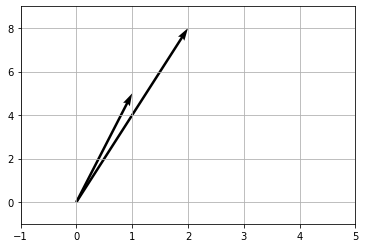

In [20]:
a = np.array([1, 5], float)
b = np.array([2, 8], float)
X, Y = np.array([0, 0]), np.array([0, 0])
U, V = np.array([a[0], b[0]]), np.array([a[1], b[1]])

plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, 5)
plt.ylim(-1, 9)
plt.grid(True)
plt.show()

__Задание 5.5.__  Вычислите смешанное произведение трех векторов:
(1, 5, 0), (2, 8, 7) и (7, 1.5, 3).

__Решение:__ 

In [21]:
a = np.array([1, 5, 0])
b = np.array([2, 8, 7])
c = np.array([7, 1.5, 3])
v = np.inner(np.cross(a, b), c)
v

228.5

### $$V = \begin{vmatrix}
1 & 5 & 0 \\ 
2 & 8 & 7 \\
7 & 1.5 & 3 
\end{vmatrix} = \begin{vmatrix}
8 & 7 \\ 
1.5 & 3 
\end{vmatrix} - 5\cdot \begin{vmatrix}
2 & 7 \\ 
7 & 3 
\end{vmatrix} + 0\cdot \begin{vmatrix}
2 & 8 \\ 
7 & 1.5 
\end{vmatrix} = 13.5 + 5\cdot43 = 228.5$$

In [22]:
C = np.array([[1, 5, 0], 
              [2, 8, 7], 
              [7, 1.5, 3]])
round(np.linalg.det(C), 2)

228.5

### Системы линейных алгебраических уравнений

__Задание 6.1.__ Решите линейную систему:
### $$\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 0 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X = \begin{bmatrix}
12 \\ 
2 \\
1
\end{bmatrix}$$

__Решение:__ <br>
Если мы запишем систему в матричном виде, то решение можно выразить следующим образом
### $$A \cdot X = B \Rightarrow X = A^{-1}\cdot B$$
В задании 5.3 мы уже нашли матрицу $A^{-1}$ воспользуемся этим для решения системы:
### $$X = \begin{pmatrix}
-0.8 & 0.1 & 0.2 \\ 
0.1 & -0.2 & 0.1 \\
0.53 & 0.1 & -0.13
\end{pmatrix} \cdot \begin{pmatrix}
12 \\ 
2\\
1
\end{pmatrix} = \begin{pmatrix}
-9.2 \\ 
0.9\\
6.47
\end{pmatrix}$$

In [23]:
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

__Задание 6.2.__ Найдите псевдорешение:
### $$\left\{
\begin{array}{ll}
  x + 2y - z = 1, \\
  3x - 4y = 7, \\
  8x - 5y + 2z = 12, \\
  2x - 5z = 7, \\
  11x + 4y - 7z = 15.
\end{array} \right.$$

__Решение:__ Воспользуемся встроенным в NumPy оптимизационным алгоритмом для нахождения псевдорешения данной переопределенной системы:

In [24]:
A = np.array([[1, 2, -1], 
              [3, -4, 0], 
              [8, -5, 2], 
              [2, 0, -5], 
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
X, res, rank, s  = np.linalg.lstsq(A, B, rcond=-1)
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

Таким образом псевдорешением данной системы является следующий вектор:

In [25]:
print(X)

[ 1.13919353 -0.90498444 -0.9009803 ]


Зная это можно построить расчетный вектор $\hat{B}$ для данного решения:

In [26]:
A @ X

array([ 0.23020495,  7.03751834, 11.83650981,  6.78328855, 15.21805313])

__Задание 6.3__ Сколько решений имеет линейная система:
### $$\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X = \begin{bmatrix}
12 \\ 
2 \\
1
\end{bmatrix}$$
Если ноль - то измените вектор правой части так, чтобы система стала совместной, и решите ее.

__Решение:__ <br>
Легко заметить, что матрица в левой части уравнения имеет ранг 2, так как последнюю строку можно выразить через первые две (из удвоенной второй вычесть первую).

In [27]:
A  = np.array([[1, 2, 3], 
               [4, 5, 6], 
               [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1)

np.linalg.matrix_rank(A), np.linalg.matrix_rank(C) 

(2, 3)

Как видим ранги основной матрицы $A$ и расширенной матрицы $C$ не совпадают, а значит система является несовместной, то есть _не имеет решений_. Для того, чтобы система стала совместной нам нужно изменить вектор $B$ таким образом, чтобы ранг расширенной матрицы также стал равен 2. Тогда представленная система будет иметь бесконечное множество решений, так как ранг матриц будет меньше количества неизвестных. Воспользуемся наблюдением относительно того, как третья строка основной матрицы может быть выражена через первые две, и изменим последнюю координату вектора $B$.

In [28]:
B = np.array([[12, 2, -8]])
C = np.concatenate((A, B.T), axis=1)

np.linalg.matrix_rank(A), np.linalg.matrix_rank(C) 

(2, 2)

Воспользуемся оптимизационным алгоритмом библиотеки NumPy и найдем одно из множества решений, а именно то, которое имеет минимальную норму:

In [29]:
B = np.array([12, 2, -8])
X, res, rank, s  = np.linalg.lstsq(A, B, rcond=-1)
np.linalg.lstsq(A, B, rcond=-1)

(array([-10.44444444,  -1.11111111,   8.22222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

__Задание 6.4.__ Вычислите LU-разложение матрицы:
### $$\begin{bmatrix}
1 & 2 & 3 \\ 
2 & 16 & 21 \\
4 & 28 & 73 
\end{bmatrix} $$

__Решение:__ <br>
Воспользуемся методом библиотеки SciPy, чтобы найти искомое разложение:

In [30]:
A = np.array([[1, 2, 3], 
              [2, 16, 21], 
              [4, 28, 73]])

P, L, U = lu(A)
print('P = \n', P)
print('L = \n', L)
print('U = \n', U)

P = 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L = 
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U = 
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


__Задание 6.5.__ Найдите нормальное псевдорешение недоопределенной системы:
### $$\left\{
\begin{array}{ll}
  x + 2y - z = 1, \\
  8x - 5y + 2z = 12.
\end{array} \right.$$
Для этого определите функцию $Q(x, y, z)$, равную норме решения, и найдите ее минимум.

__Решение:__ <br>
Для начала выразим переменные $y$ и $z$ из уравнений системы через $x$:
### $$y = 10x - 14$$
### $$z = 21x - 29$$

Теперь зададим функцию $Q(x, y, z)$, равную норме вектора, и посмотрим при каких значениях она достигает минимума:

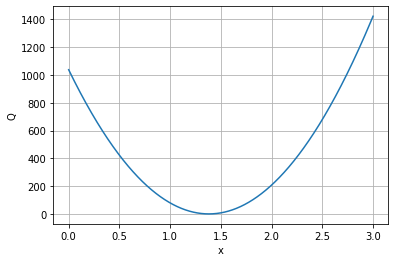

In [31]:
def Q(x, y, z):
    return x**2 + y**2 + z **2

x = np.linspace(0, 3, 500001)
plt.plot(x, Q(x, 10*x-14, 21*x-29))
plt.xlabel('x')
plt.ylabel('Q')
plt.grid(True)
plt.show()

In [32]:
x_0 = x[np.argmin(Q(x, 10*x-14, 21*x-29))]
y_0 = 10*x_0 - 14
z_0 = 21*x_0 - 29
np.array([x_0, y_0, z_0])

array([ 1.38192, -0.1808 ,  0.02032])

Проверим, правильность наших расчетов, воспользовавшись методом библиотеки NumPy для нахождения нормальных псевдорешений:

In [33]:
A = np.array([[1, 2, -1], 
              [8, -5, 2]])
B = np.array([1, 12])

np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

Как видим решения, полученные разными способами, очень близки. 

__Задание 6.6.__ Найдите одно из псевдорешений вырожденной системы:
### $$\begin{bmatrix}
1 & 2 & 3 \\ 
4 & 5 & 6 \\
7 & 8 & 9 
\end{bmatrix} \cdot X = \begin{bmatrix}
2 \\ 
5 \\
11
\end{bmatrix}$$
Попробуйте также отыскать и нормальное псевдорешение.

__Решение:__ <br>
Воспользуемся QR-разложением, представленном на уроке, матрицы $A$ для нахождения псевдорешения:

In [34]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print('Q = \n', Q)
print('R = \n', R)

Q = 
 [[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
R = 
 [[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


Далее воспользуемся следующим представлением:
### $$ R = \begin{pmatrix}
R_1 & R_2 \\
0 & 0
\end{pmatrix}$$
### $$ X = \begin{pmatrix}
X_1 \\
X_2
\end{pmatrix}$$
### $$ R_1\cdot X_1 = Q^T \cdot B - R_2 \cdot X_2$$
Представляя последнюю координату вектора решения как $X_2 = 0$, получаем следующее псевдорешение:

In [35]:
R1 = R[:2, :2]
B1 = (Q.T @ B)[:2]
X_1 = np.linalg.solve(R1, B1)
X = np.round(np.append(X_1, 0), 6)
print(X)

[1.5 0.  0. ]


Норма найденного псевдорешения:

In [36]:
np.linalg.norm(X)

1.5

Норма вектора невязки:

In [37]:
np.linalg.norm(A @ X - B)

1.224744871391589

Теперь воспользуемся оптимизационным алгоритмом библиотеки NumPy, чтобы найти нормальное псевдорешение данной системы:

In [38]:
X_norm, res, rank, s  = np.linalg.lstsq(A, B, rcond=-1)
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

Рассчитаем норму этого решения и норму вектора невязки для него:

In [39]:
np.linalg.norm(X_norm), np.linalg.norm(A @ X_norm - B)

(1.3693063937629126, 1.2247448713915892)

Норма данного решения меньше, чем найденного ранее, а норма вектора невязки, что логично осталась без изменений.